In [1]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import sys
import os
import logging

logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# check out .d file accumulation time

In [3]:
import alphatims.bruker

dotd_file_path = "/cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075.d"
data = alphatims.bruker.TimsTOF(dotd_file_path)
logging.info(
    "Maximum accumulation time for 80ms ramp time %s", data.max_accumulation_time
)

2024-07-26 11:39:26,469 - h5py._conv - DEBUG - Creating converter from 7 to 5
2024-07-26 11:39:26,470 - h5py._conv - DEBUG - Creating converter from 5 to 7
2024-07-26 11:39:26,471 - h5py._conv - DEBUG - Creating converter from 7 to 5
2024-07-26 11:39:26,471 - h5py._conv - DEBUG - Creating converter from 5 to 7
2024-07-26 11:39:26,889 - root - INFO - Importing data from /cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075.d
2024-07-26 11:39:26,891 - root - INFO - Using HDF import for /cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075.hdf
2024-07-26 11:39:26,921 - h5py._conv - DEBUG - Creating converter from 3 to 5
2024-07-26 11:39:28,630 - numba.core.entrypoints - DEBUG - Loading extension: EntryPoint(name='init', value='sparse._numba_extension:_init_extension', group='numba_extensions')
2024-07-26 11:39:29,120 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2

In [4]:
dotd_file_path = "/cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078.d"
data = alphatims.bruker.TimsTOF(dotd_file_path)
logging.info(
    "Maximum accumulation time for 100ms ramp time %s", data.max_accumulation_time
)

2024-07-26 11:39:40,225 - root - INFO - Importing data from /cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078.d
2024-07-26 11:39:40,227 - root - INFO - Using HDF import for /cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078.hdf
2024-07-26 11:39:40,361 - root - INFO - Successfully imported data from /cmnfs/proj/ORIGINS/data/tims_ramp_time/Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078.d
2024-07-26 11:39:40,368 - root - INFO - Maximum accumulation time for 100ms ramp time 100.045


# Split evidence file for difference ramp time

## All evidence

In [18]:
evidence = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/combined/txt/evidence.txt", sep="\t"
)
evidence["Number of scans"].describe()

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2082124/2531008971.py:1: DtypeWarning: Columns (62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence = pd.read_csv(


count    190564.000000
mean         10.816602
std           4.333890
min           2.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          55.000000
Name: Number of scans, dtype: float64

In [12]:
evidence["mz_bins"] = np.round(evidence["m/z"], 2)

In [21]:
top_5_mz_bins = evidence["mz_bins"].value_counts().head(10)
evidence_top_5_mz_bins = evidence[evidence["mz_bins"].isin(top_5_mz_bins.index)]

In [23]:
tmp = evidence_top_5_mz_bins.loc[
    :,
    [
        "Modified sequence",
        "Charge",
        "Calibrated retention time start",
        "Retention time",
        "Calibrated retention time finish",
        "mz_bins",
        "1/K0",
    ],
].sort_values(["mz_bins", "Retention time"])

In [20]:
evidence["Raw file"].unique()
evidence["ramp_time"] = evidence["Raw file"].str.extract(r"(\d+ms)")

array(['Hela2ug_lowflow_30min_1to37to42_NCE29to59_140ms7R_RA2_1_2086',
       'Hela2ug_lowflow_30min_1to37to42_NCE29to59_100ms7R_RA2_1_2078',
       'Hela2ug_lowflow_30min_1to37to42_NCE29to59_120ms7R_RA2_1_2082',
       'Hela2ug_lowflow_30min_1to37to42_NCE29to59_160ms7R_RA2_1_2091',
       'Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075'],
      dtype=object)

In [ ]:
# import re

# pattern = r"\d+ms"
# for raw_file in evidence["Raw file"].unique():
#     ramp_time = re.search(pattern, raw_file).group()
#     print(ramp_time)
#     evidence_raw_file = evidence[evidence["Raw file"] == raw_file]
#     evidence_raw_file.to_csv(
#         "/cmnfs/proj/ORIGINS/data/tims_ramp_time/combined/txt/evidence_"
#         + ramp_time
#         + ".txt",
#         sep="\t",
#     )

# Plot peptide property

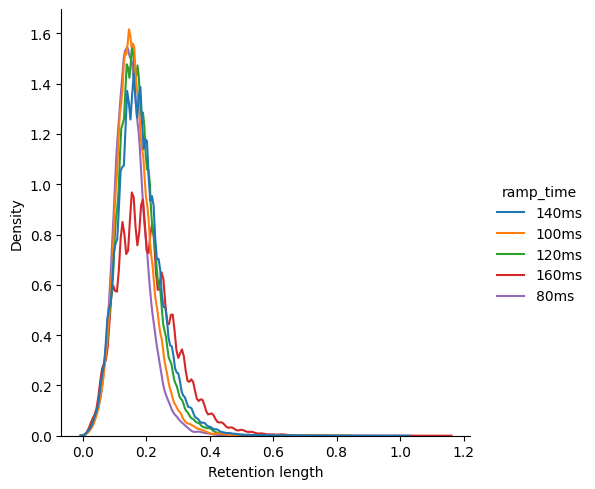

In [5]:
import seaborn as sns

sns.displot(evidence, x="Retention length", kind="kde", hue="ramp_time")

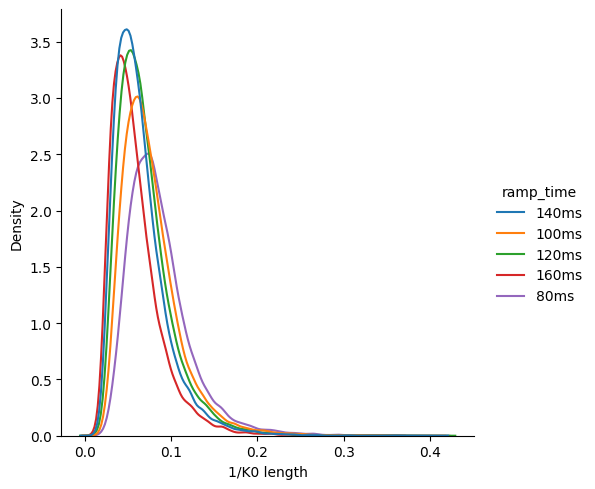

In [6]:
sns.displot(evidence, x="1/K0 length", kind="kde", hue="ramp_time")

In [23]:
evidence.groupby("ramp_time")["Ion mobility length"].describe()

,count,mean,std,min,25%,50%,75%,max
ramp_time,,,,,,,,
100ms,38321.0,153.533024,68.974614,22.0,106.0,139.0,184.0,811.0
120ms,40716.0,168.821323,79.298069,16.0,115.0,154.0,202.0,1009.0
140ms,40964.0,182.800264,89.456738,19.0,121.0,163.0,220.0,1159.0
160ms,35528.0,192.289096,99.129204,25.0,124.0,169.0,232.0,1165.0
80ms,35035.0,137.430427,58.858690,19.0,97.0,127.0,163.0,649.0


<Axes: xlabel='ramp_time', ylabel='count'>

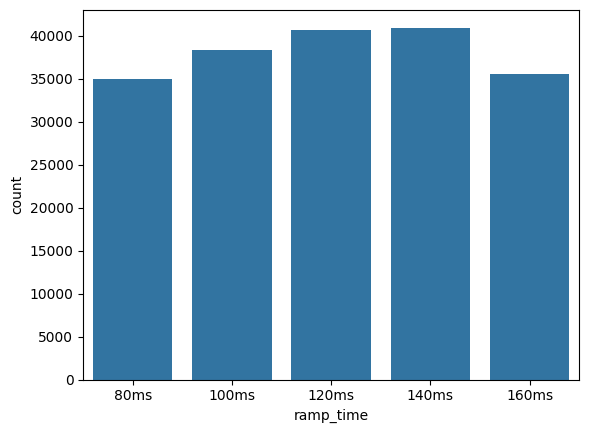

In [7]:
sns.countplot(
    data=evidence, x="ramp_time", order=["80ms", "100ms", "120ms", "140ms", "160ms"]
)

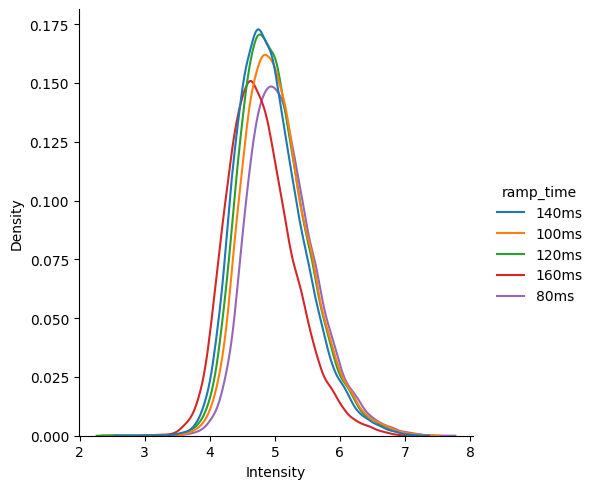

In [ ]:
sns.displot(
    data=evidence, x=np.log10(evidence["Intensity"] + 1), kind="kde", hue="ramp_time"
)

# Compare with larger libraries

In [28]:
deep_library = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/HeLa_library/txt_Hela_Deep/evidence.txt",
    sep="\t",
)
long_gradient_library = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/HeLa_library/txt_Hela_DDA_120min/evidence.txt",
    sep="\t",
)

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2079591/2814403978.py:1: DtypeWarning: Columns (61,69) have mixed types. Specify dtype option on import or set low_memory=False.
  deep_library = pd.read_csv(


In [29]:
evidence_unique_pcm = evidence.drop_duplicates(subset=["Modified sequence", "Charge"])
long_gradient_library_unique_pcm = long_gradient_library.drop_duplicates(
    subset={"Modified sequence", "Charge"}
)

In [30]:
deep_library_unique_pcm = deep_library.drop_duplicates(
    subset=["Modified sequence", "Charge"]
)

# Compare intensity from SWAPS

Characters of different Ramp time (RT res, IM res, # ID from maxquant)
- 160ms: (1166, 1497, 34957)
- 140ms: (1842, 1310, 40355)
- 120ms: (2237, 1123, 40155)
- 100ms: (2467, 937, 37816)
- 80ms: (2963, 750, 34605)

To evaluation:
1. Variation of RT and IM of the same precursors
2. Variation of Intensity?
3. Use the same dictionary and do SWAPS, see # ID? Quant results?


In [13]:
evidence["log_intensity"] = np.log10(evidence["Intensity"] + 1)

In [14]:
rep_evidence = evidence.groupby(["Modified sequence", "Charge"]).aggregate(
    {
        "Retention time": ["mean", "std"],
        "1/K0": ["mean", "std"],
        "log_intensity": ["mean", "std"],
        "Raw file": "nunique",
        "mz_bins": "mean",
    }
)

In [15]:
rep_evidence.columns

MultiIndex([('Retention time',    'mean'),
            ('Retention time',     'std'),
            (          '1/K0',    'mean'),
            (          '1/K0',     'std'),
            ( 'log_intensity',    'mean'),
            ( 'log_intensity',     'std'),
            (      'Raw file', 'nunique'),
            (       'mz_bins',    'mean')],
           )

<Axes: >

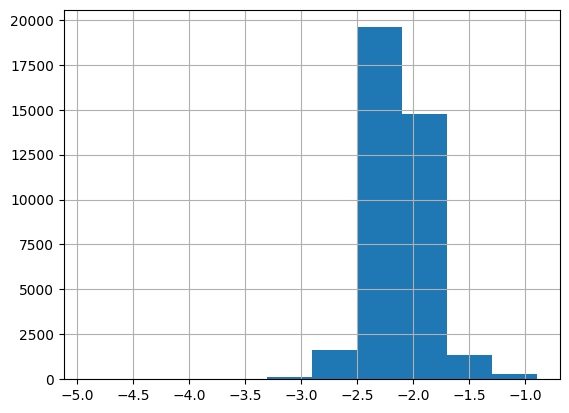

In [16]:
np.log10(
    rep_evidence.loc[rep_evidence[(("Raw file", "nunique"))] >= 3, ("1/K0", "std")]
).hist()

<Axes: >

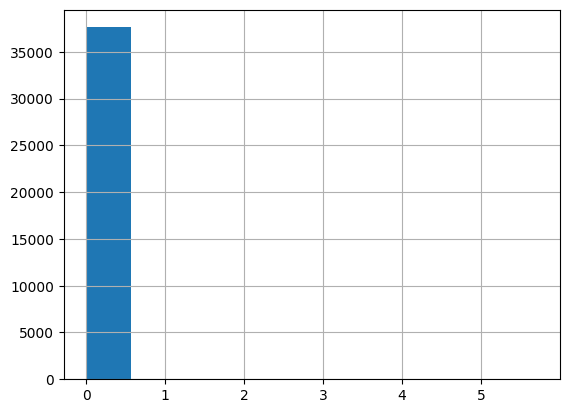

In [17]:
(
    rep_evidence.loc[
        rep_evidence[(("Raw file", "nunique"))] >= 3, ("Retention time", "std")
    ]
).hist()

<Axes: >

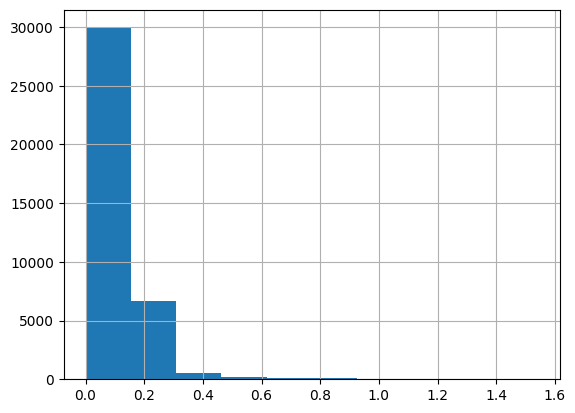

In [19]:
(
    rep_evidence.loc[
        rep_evidence[(("Raw file", "nunique"))] >= 3, ("log_intensity", "std")
    ]
).hist()

# Filter out sequence appeared in all exp

In [18]:
filtered_sequences = rep_evidence[rep_evidence[("Raw file", "nunique")] == 5].index
random_indices = np.random.choice(len(filtered_sequences), 550, replace=False)
# Check if 'Charge' column exists in rep_evidence DataFrame
filtered_sequences_sample = filtered_sequences[random_indices]
filtered_evidence = evidence[
    (
        evidence["Modified sequence"].isin(
            rep_evidence.loc[filtered_sequences].index.get_level_values(0)
        )
    )
    & (
        evidence["Charge"].isin(
            rep_evidence.loc[filtered_sequences].index.get_level_values(1)
        )
    )
]

In [19]:
top_5_mz_bins = filtered_evidence["mz_bins"].value_counts().head(10)
evidence_top_5_mz_bins = filtered_evidence[
    filtered_evidence["mz_bins"].isin(top_5_mz_bins.index)
]

In [27]:
tmp = evidence_top_5_mz_bins.loc[
    :,
    [
        "Modified sequence",
        "Charge",
        "Calibrated retention time start",
        "Retention time",
        "Calibrated retention time finish",
        "mz_bins",
        "1/K0",
        "Raw file",
    ],
].sort_values(["mz_bins", "Retention time"])

- 8265	_ALEQFATVVEAK_	2	13.145	13.176	13.27	653.36	1.0294898	Hela2ug_lowflow_30min_1to37to42_NCE29to59_160ms7R_RA2_1_2091
- 113733	_LTVMSLQESGLK_	2	12.863	12.926	13.02	653.36	0.9756662	Hela2ug_lowflow_30min_1to37to42_NCE29to59_160ms7R_RA2_1_2091

- 114271	_LVHLPSCTVFSNFPVIK_	3	16.609	16.668	16.798	653.36	0.8799863	Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075
- 80389	_IGPITPLEFYR_	2	16.623	16.717	16.905	653.36	0.99238926	Hela2ug_lowflow_30min_1to37to42_NCE29to59_160ms7R_RA2_1_2091

- 110960	_LQSTFVFEEIGR_	2	15.566	15.661	15.756	713.37	0.9810525	Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075
- 186690	_YISPDQLADLYK_	2	15.744	15.827	16.052	713.37	1.0038481	Hela2ug_lowflow_30min_1to37to42_NCE29to59_80ms7R_RA2_1_2075

<Axes: xlabel='Calibrated 1/K0', ylabel='log_intensity'>

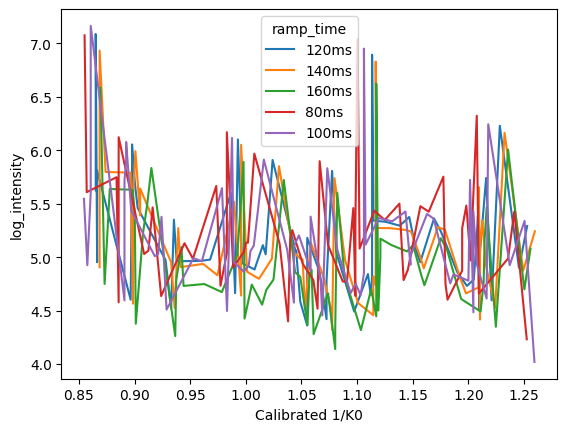

In [60]:
sns.lineplot(
    data=filtered_evidence,
    x="Calibrated 1/K0",
    y="log_intensity",
    hue="ramp_time",
    sort=True,
    estimator=None,
)

# Filter out interesting sequence from long gradient library

In [34]:
long_gradient_library_unique_pcm["mz_bins"] = np.round(
    long_gradient_library_unique_pcm["m/z"], 2
)
top_5_mz_bins = long_gradient_library_unique_pcm["mz_bins"].value_counts().head(10)
evidence_top_5_mz_bins = long_gradient_library_unique_pcm[
    long_gradient_library_unique_pcm["mz_bins"].isin(top_5_mz_bins.index)
]

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2079591/657443918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_gradient_library_unique_pcm["mz_bins"] = np.round(


In [35]:
tmp = evidence_top_5_mz_bins.loc[
    :,
    [
        "Modified sequence",
        "Charge",
        "Calibrated retention time start",
        "Retention time",
        "Calibrated retention time finish",
        "mz_bins",
        "1/K0",
        "Raw file",
    ],
].sort_values(["mz_bins", "Retention time"])

In [36]:
maxquant_result_ref = pd.read_pickle(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/tims_ramp_time/pred_120min_library_80ms_20240726_121311_677677/maxquant_result_ref.pkl"
)

In [41]:
tmp.columns

Index(['Modified sequence', 'Charge', 'Calibrated retention time start',
       'Retention time', 'Calibrated retention time finish', 'mz_bins', '1/K0',
       'Raw file'],
      dtype='object')

- 197661	_TQEAGALGVSDR_	2	14.793	15.067	15.321	602.3	0.944879414813383	Hela_120min_15ug_R2_RA1_1_5220
- 191441	_TFEGHDASVLK_	2	14.941	15.078	15.312	602.3	0.943375470068848	Hela_120min_15ug_R1_RA1_1_5220

In [38]:
maxquant_result_ref.loc[
    maxquant_result_ref["Modified sequence"] == "_TQEAGALGVSDR_", "mz_rank"
]
maxquant_result_ref.loc[
    maxquant_result_ref["Modified sequence"] == "_TFEGHDASVLK_", "mz_rank"
]

8852    15198
Name: mz_rank, dtype: int64

8976    15205
Name: mz_rank, dtype: int64

In [39]:
evidence = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/combined/txt/evidence.txt", sep="\t"
)

/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/notebooks/ipykernel_2079591/4011102845.py:1: DtypeWarning: Columns (62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence = pd.read_csv(


# RT delta

In [3]:
evidence_train_transfer = pd.read_csv(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/mixture/RT_filter_updated_MixA_5ug_30min_7R_R1_RA1_1_5133_20240726_092043_637475/RT_tranfer_learn/evidence__FilteredByClosestRT_transfer_RT_pred_filtered.txt",
    sep="\t",
)

In [4]:
from utils.metrics import RT_metrics

rt_eval = RT_metrics(
    RT_obs=evidence_train_transfer["Retention time"],
    RT_pred=evidence_train_transfer["predicted_RT"],
)
rt_eval.CalcDeltaRTwidth(calc="real")

1.8298171353496002

2024-07-26 16:32:44,007 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-07-26 16:32:44,008 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-07-26 16:32:44,012 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-07-26 16:32:44,013 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2024-07-26 16:32:44,013 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='norm

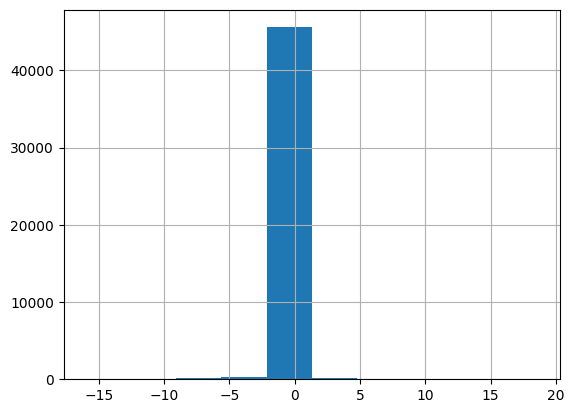

In [5]:
rt_eval.PlotDeltaRT()

In [6]:
np.percentile(rt_eval.y_delta, 2.5)
np.percentile(rt_eval.y_delta, 97.5)

-0.9855067394679248

0.8443103958816754

In [10]:
np.percentile(abs(rt_eval.y_delta), 95)

0.8976782601322676

In [14]:
rt_eval.p_low

-0.9855067394679248

In [15]:
rt_eval.p_high

0.8443103958816754

<Axes: ylabel='Density'>

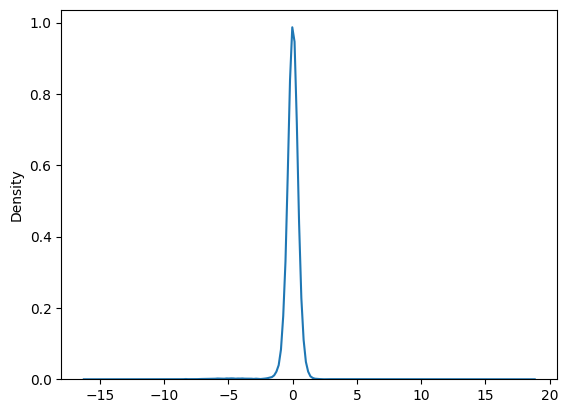

In [11]:
import seaborn as sns

sns.kdeplot(rt_eval.y_delta, cumulative=False)

<Axes: ylabel='Density'>

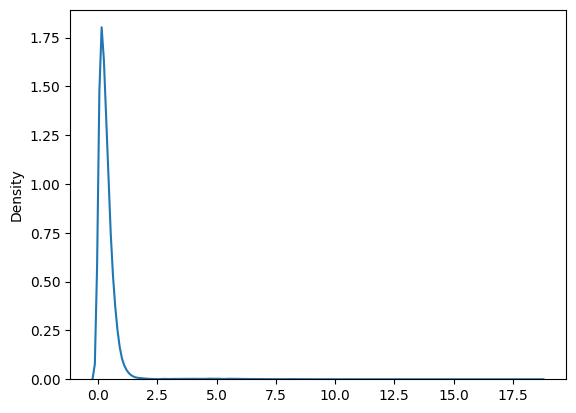

In [12]:
sns.kdeplot(abs(rt_eval.y_delta), cumulative=False)